10000
The optimal reward is  -4.7928
Our controller achieved a reward of  -4.777


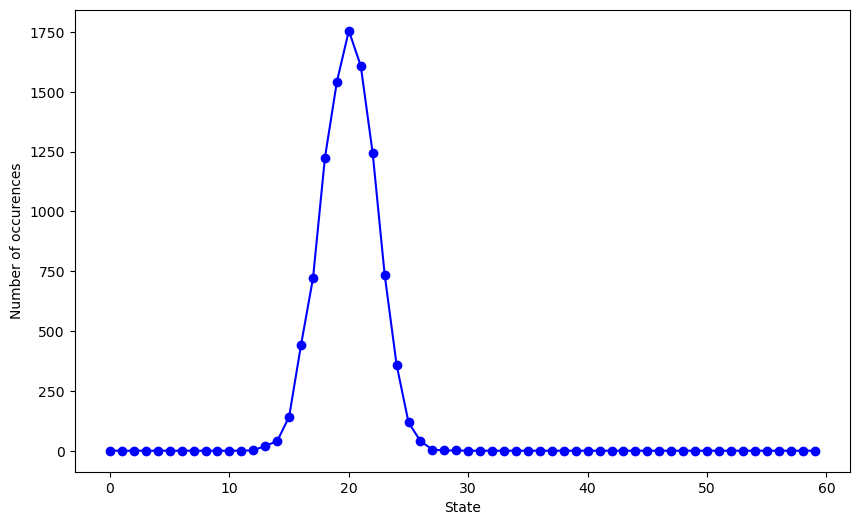

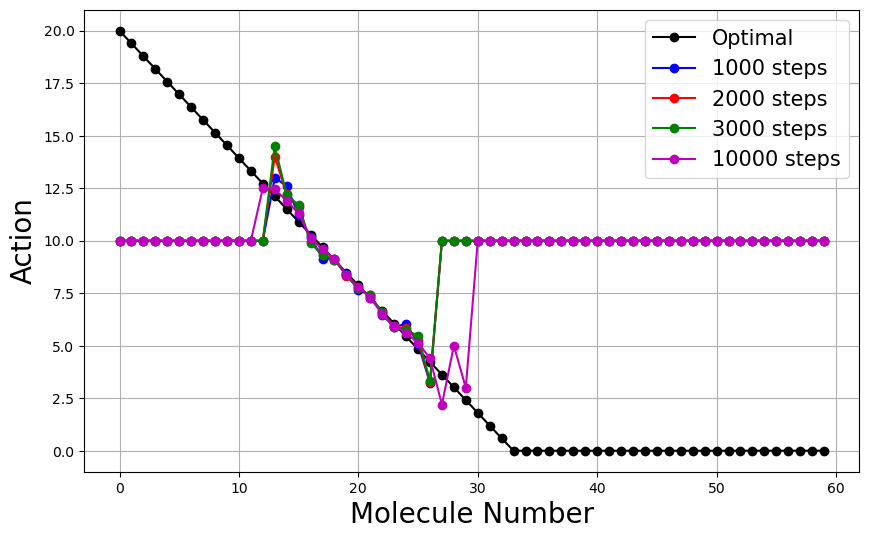

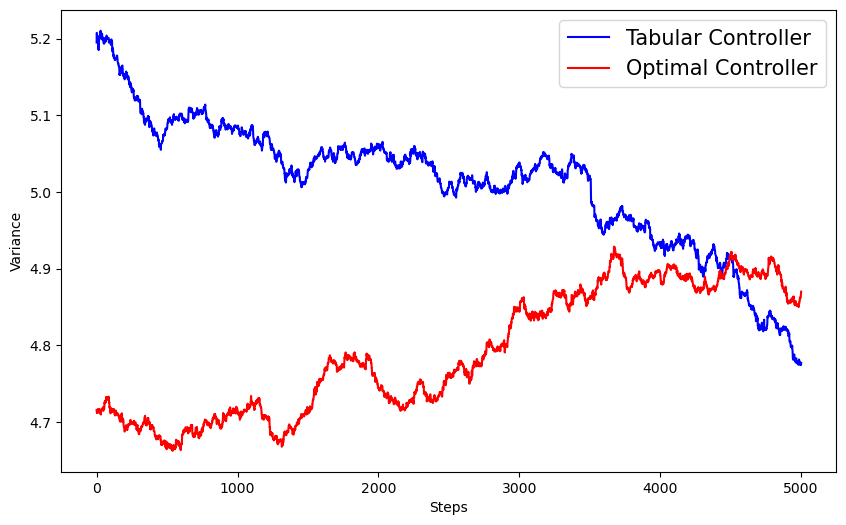

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

import time
import random

from gymnasium import spaces
import molcontrol

## Parameters
steps = 1000
target = 20
molecule_lifetime = 1.0
dt = 0.5
history_length = 1
observable_indices = np.array([0])
upper_mol = target*3

##Seed
RUN_SEED = 2
forget_param = 1/1000.0

## Our lookup table
average_death = target * dt/molecule_lifetime
action_array, counter_array = molcontrol.table_init(len(observable_indices), target*3, average_death)
rewards_overtime = molcontrol.tabular_molecule_controller(action_array, counter_array, forget_param, steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED)

action_array_save1 = np.copy(action_array)
rewards_overtime2 = molcontrol.tabular_molecule_controller(action_array, counter_array, forget_param, steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED)

action_array_save2 = np.copy(action_array)
rewards_overtime3 = molcontrol.tabular_molecule_controller(action_array, counter_array, forget_param, steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED)

action_array_save3 = np.copy(action_array)
rewards_overtime4 = molcontrol.tabular_molecule_controller(action_array, counter_array, forget_param, 7000, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED)

rewards_overtime = np.concatenate((rewards_overtime, rewards_overtime2, rewards_overtime3, rewards_overtime4))
print (len(rewards_overtime))


## The optimal solution
upper_mol = target*3
action_vals_th = molcontrol.control_plot_1dopt(upper_mol, target, molecule_lifetime, dt)
rewards_overtime_opt = molcontrol.optimal_solution(10000, target, molecule_lifetime, dt, RUN_SEED)

optimal_reward = np.mean(rewards_overtime_opt)
print ("The optimal reward is ", optimal_reward)
print ("Our controller achieved a reward of ", np.mean(rewards_overtime[-5000:]))

plt.figure(figsize=(10, 6))
plt.plot(counter_array, marker='o', linestyle='-', color='b')
plt.xlabel("State")
plt.ylabel("Number of occurences")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(action_vals_th, marker='o', linestyle='-', color='k', label = 'Optimal')

plt.plot(action_array_save1, marker='o', linestyle='-', color='b', label = '1000 steps')
plt.plot(action_array_save2, marker='o', linestyle='-', color='r', label = '2000 steps')
plt.plot(action_array_save3, marker='o', linestyle='-', color='g', label = '3000 steps')
plt.plot(action_array, marker='o', linestyle='-', color='m', label = '10000 steps')

plt.legend(loc = 'best', fontsize = 15)
plt.xlabel("Molecule Number", fontsize = 20)
plt.ylabel("Action", fontsize = 20)
plt.savefig("Lookup_Tables_get_better.png")
plt.grid(True)
plt.show()

def smooth(data, smoothing_window):
    return np.convolve(data, np.ones(smoothing_window)/smoothing_window, mode='valid')

smoothing_window = 5000
smoothed_reward = smooth(-rewards_overtime, smoothing_window)
smoothed_reward_opt = smooth(-rewards_overtime_opt, smoothing_window)

plt.figure(figsize=(10, 6))
plt.plot(smoothed_reward, linestyle='-', color='b', label = 'Tabular Controller')
plt.plot(smoothed_reward_opt, linestyle='-', color='r', label = 'Optimal Controller')
plt.xlabel("Steps")
plt.ylabel("Variance")
plt.legend(loc='best', fontsize = 15)
plt.show()